In [148]:
import pandas as pd 

In [149]:
titanic_df = pd.read_csv(r'C:\project\titanic\train.csv') #타이타닉 탑승자 파일

In [150]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [151]:
print('titanic 변수 type:', type(titanic_df))
print('DataFrame 크기: ',titanic_df.shape)

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>
DataFrame 크기:  (891, 12)


In [152]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [153]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 결손데이터 확인

In [154]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 결손데이터 대체하기

In [155]:
titanic_df['Age']=titanic_df['Age'].fillna(titanic_df['Age'].mean()) #나이는 평균으로 대체
titanic_df['Embarked']=titanic_df['Embarked'].fillna('N') #항만은 N로 대체
titanic_df['Cabin']=titanic_df['Cabin'].fillna('N')

In [156]:
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

## 사이킷런으로 수행하는 타이타닉 생존자 예측

In [157]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [183]:
print(' Sex 값 분포:\n',titanic_df['Sex'].value_counts())
print(' Pclass 값 분포:\n',titanic_df['Pclass'].value_counts())
print(' Age_band 값 분포:\n',titanic_df['Age_band'].value_counts())

 Sex 값 분포:
 male      577
female    314
Name: Sex, dtype: int64
 Pclass 값 분포:
 3    491
1    216
2    184
Name: Pclass, dtype: int64
 Age_band 값 분포:
 y    373
a    195
s    162
t     70
b     44
c     25
e     22
Name: Age_band, dtype: int64


In [194]:
print(' Sex 값 분포:\n',X_titanic_df['Sex'].value_counts())
print(' Pclass 값 분포:\n',X_titanic_df['Pclass'].value_counts())
print(' Age_band 값 분포:\n',X_titanic_df['Age_band'].value_counts())

 Sex 값 분포:
 1    577
0    314
Name: Sex, dtype: int64
 Pclass 값 분포:
 3    491
1    216
2    184
Name: Pclass, dtype: int64
 Age_band 값 분포:
 6    373
0    195
4    162
5     70
1     44
2     25
3     22
Name: Age_band, dtype: int64


In [160]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [161]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

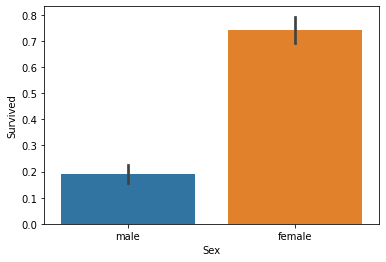

In [162]:
sns.barplot(x='Sex',y='Survived',data=titanic_df)

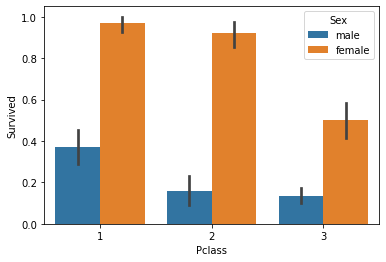

In [163]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

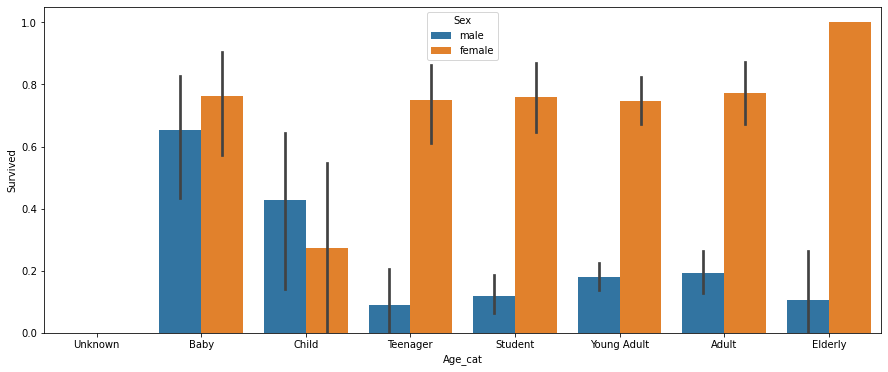

In [164]:
def get_category(age):
    cat=''
    if age <= -1: cat= 'UnKnown'
    elif age <= 5: cat= 'Baby'
    elif age <= 12: cat= 'Child'
    elif age <= 18: cat= 'Teenager'
    elif age <= 25: cat= 'Student'
    elif age <= 35: cat= 'Young Adult'
    elif age <= 60: cat= 'Adult'
    else : cat = 'Elderly'
        
    return cat

plt.figure(figsize=(15,6))
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category() 함수를 반환값으로 지정
# get_category(X)는 입력값으로 'Age' 칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex',data=titanic_df, order=group_names)
titanic_df.drop('Age_cat',axis=1,inplace=True)

In [165]:
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S


In [166]:
titanic_df['Age_band']=0

### 연속형 데이터(나이)를 범주형 데이터로 바꿔준다.

In [167]:
# 비어있는 나이를 평균 나이로 채워준다.
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [168]:
titanic_df.loc[titanic_df['Age'] <= 5,'Age_band'] = "b"
titanic_df.loc[(titanic_df['Age'] > 5)&(titanic_df['Age'] <= 12),'Age_band'] = "c"
titanic_df.loc[(titanic_df['Age'] > 12)&(titanic_df['Age'] <= 18),'Age_band'] = "t"
titanic_df.loc[(titanic_df['Age'] > 18)&(titanic_df['Age'] <= 25),'Age_band'] = "s"
titanic_df.loc[(titanic_df['Age'] > 25)&(titanic_df['Age'] <= 35),'Age_band'] = "y"
titanic_df.loc[(titanic_df['Age'] > 35)&(titanic_df['Age'] <= 60),'Age_band'] = "a"
titanic_df.loc[titanic_df['Age'] > 60,'Age_band'] = "e"

In [169]:
print(' 나이 값 분포:\n',titanic_df['Age_band'].value_counts())

 나이 값 분포:
 y    373
a    195
s    162
t     70
b     44
c     25
e     22
Name: Age_band, dtype: int64


In [170]:
# 비어있는 객실을 평균 나이로 채워준다.
titanic_df['Cabin'].fillna('N',inplace=True)

In [171]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]

In [172]:
print(' 객실 값 분포:\n',titanic_df['Cabin'].value_counts())

 객실 값 분포:
 N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


### 남아있는 문자열 카테고리 피처를 숫자형 카테고리 피처로 변환 -> labelEncoder

In [185]:
from sklearn import preprocessing

In [186]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

In [187]:
# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket','SibSp','Parch','Fare','Embarked','Cabin','Age'],axis=1,inplace=True)
    return df

In [188]:
#레이블 인코딩 수행
def format_features(df):
    features = ['Sex','Age_band']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
    return df

In [191]:
#앞에서 설정한 데이터 전처리 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [192]:
#원본 데이터를 재로딩하고, 피처 데이터 세트와 레이블 데이터 세트 추출
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [193]:
X_titanic_df

,Pclass,Sex,Age_band
0,3,1,4
1,1,0,0
2,3,0,6
3,1,0,6
4,3,1,6
...,...,...,...
886,2,1,6
887,1,0,4
888,3,0,6
889,1,1,6


In [180]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [35]:
lr_clf=LogisticRegression(max_iter=200)

In [121]:
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred)))

LogisticRegression 정확도: 0.8324


## 학습모델 저장하기

In [37]:
from sklearn import datasets
import pickle

In [38]:
saved_model = pickle.dumps(lr_clf)

In [39]:
clf_from_pickle = pickle.loads(saved_model)

In [40]:
lr_pred_pkl = clf_from_pickle.predict(X_test)

In [41]:
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred_pkl)))

LogisticRegression 정확도: 0.8324


In [42]:
with open( "titanic_model.pkl", "wb" ) as file:
    pickle.dump( lr_clf, file)

In [43]:
with open( "titanic_model.pkl", "rb" ) as file:
    loaded_data = pickle.load(file)
    print(loaded_data)

LogisticRegression(max_iter=200)


In [44]:
lr_pred_pkl = loaded_data.predict(X_test)

In [45]:
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test,lr_pred_pkl)))

LogisticRegression 정확도: 0.8324
